In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

dataset = pd.read_excel("Sample Assessment Data_AA Assignment.xlsx")

In [2]:
print(dataset.shape)
dataset.head()

(3924, 13)


,Candidate ID,Internship/ Full time,Campus,Gender,Time Taken,Assessment 1,Assessment 2,Assessment 3,Assessment 4,Total Score,Assessment Shortlisted,GD Shortlisted,PI Shortlisted / Offered
0,13365775,Intern,C1,Male,00:29:58,6,7,8,9,9.0,N,N,N
1,13365840,Intern,C1,Male,00:29:56,8,9,7,8,9.0,N,N,N
2,13365846,Intern,C1,Male,00:28:02,9,9,7,9,9.0,N,N,N
3,13365865,Intern,C1,Male,00:29:56,8,6,9,9,9.0,N,N,N
4,13365999,Intern,C1,Male,00:29:56,7,9,7,9,9.0,N,N,N


### Missing Values

In [3]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

#### Since there is no missing value in the given dataeset we will analyze further
---

### Duplicate Values

In [4]:
duplicateRowsDF = dataset[dataset.duplicated(keep='last')]
duplicateRowsDF

,Candidate ID,Internship/ Full time,Campus,Gender,Time Taken,Assessment 1,Assessment 2,Assessment 3,Assessment 4,Total Score,Assessment Shortlisted,GD Shortlisted,PI Shortlisted / Offered


#### No Duplicate row is there in the given dataset

In [5]:
dataset.isna().any()

Candidate ID                False
Internship/ Full time       False
Campus                      False
Gender                      False
Time Taken                  False
Assessment 1                False
Assessment 2                False
Assessment 3                False
Assessment 4                False
Total Score                 False
Assessment Shortlisted      False
GD Shortlisted              False
PI Shortlisted / Offered    False
dtype: bool

In [21]:
dataset.describe()

,Candidate ID,Assessment 1,Assessment 2,Assessment 3,Assessment 4,Total Score,Assessment Shortlisted,GD Shortlisted,PI Shortlisted / Offered
count,3.924000e+03,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000,3924.000000
mean,1.390799e+07,6.297910,5.112895,5.992864,5.670999,6.026937,0.238532,0.083588,0.012997
std,5.081752e+05,2.427682,2.049165,2.039615,2.309710,2.155158,0.426240,0.276804,0.113275
min,1.336569e+07,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.360415e+07,5.000000,4.000000,5.000000,4.000000,4.400000,0.000000,0.000000,0.000000
50%,1.374227e+07,7.000000,5.000000,6.000000,5.000000,6.000000,0.000000,0.000000,0.000000
75%,1.401752e+07,8.000000,6.000000,7.000000,8.000000,7.900000,0.000000,0.000000,0.000000
max,1.526105e+07,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000


## Catergorical Variables

In [7]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['Internship/ Full time',
 'Campus',
 'Gender',
 'Time Taken',
 'Assessment Shortlisted',
 'GD Shortlisted',
 'PI Shortlisted / Offered']

### Converting categorical variables in numerical variables for further anaysis

In [8]:
dataset['Assessment Shortlisted']=pd.get_dummies(dataset['Assessment Shortlisted'],drop_first=True)

In [9]:
dataset['GD Shortlisted']=pd.get_dummies(dataset['GD Shortlisted'],drop_first=True)

In [10]:
dataset['PI Shortlisted / Offered']=pd.get_dummies(dataset['PI Shortlisted / Offered'],drop_first=True)

In [11]:
dataset.head()

,Candidate ID,Internship/ Full time,Campus,Gender,Time Taken,Assessment 1,Assessment 2,Assessment 3,Assessment 4,Total Score,Assessment Shortlisted,GD Shortlisted,PI Shortlisted / Offered
0,13365775,Intern,C1,Male,00:29:58,6,7,8,9,9.0,0,0,0
1,13365840,Intern,C1,Male,00:29:56,8,9,7,8,9.0,0,0,0
2,13365846,Intern,C1,Male,00:28:02,9,9,7,9,9.0,0,0,0
3,13365865,Intern,C1,Male,00:29:56,8,6,9,9,9.0,0,0,0
4,13365999,Intern,C1,Male,00:29:56,7,9,7,9,9.0,0,0,0


## Representation of relations in columns

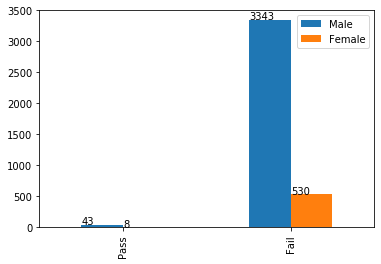

In [27]:
def bar_chart(feature):
    Pass=dataset[dataset['PI Shortlisted / Offered']==1][feature].value_counts()
    Fail=dataset[dataset['PI Shortlisted / Offered']==0][feature].value_counts()
    df=pd.DataFrame([Pass,Fail])
    df.index = ['Pass','Fail']
    ax = df.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        ax.plot(figsize=(10,10))
bar_chart('Gender')

43 Male and 8 Female got selected

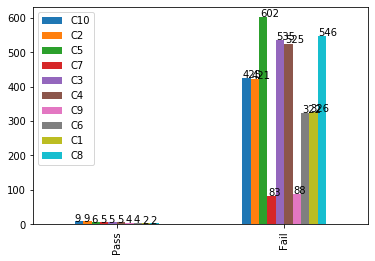

In [13]:
bar_chart('Campus')

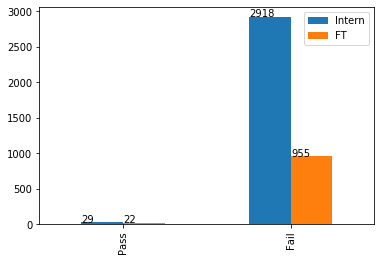

In [14]:
bar_chart('Internship/ Full time')

In [24]:
for i in dataset['Time Taken']:
    for j in dataset['PI Shortlisted / Offered']:
        if (i=="00:00:00" and j==1):
            print("Its not valid")

In [22]:
dataset.head()

,Candidate ID,Internship/ Full time,Campus,Gender,Time Taken,Assessment 1,Assessment 2,Assessment 3,Assessment 4,Total Score,Assessment Shortlisted,GD Shortlisted,PI Shortlisted / Offered
0,13365775,Intern,C1,Male,00:29:58,6,7,8,9,9.0,0,0,0
1,13365840,Intern,C1,Male,00:29:56,8,9,7,8,9.0,0,0,0
2,13365846,Intern,C1,Male,00:28:02,9,9,7,9,9.0,0,0,0
3,13365865,Intern,C1,Male,00:29:56,8,6,9,9,9.0,0,0,0
4,13365999,Intern,C1,Male,00:29:56,7,9,7,9,9.0,0,0,0


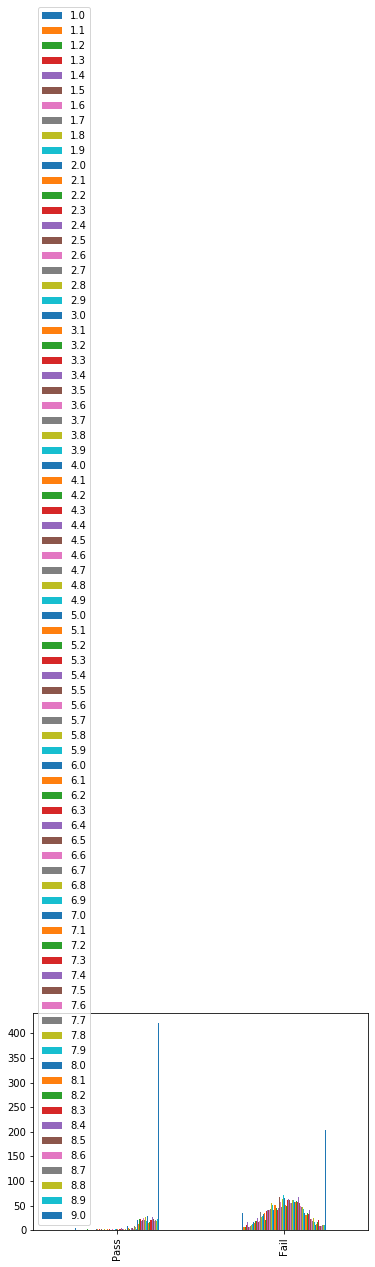

In [40]:
def bar_chart2(feature):
    Pass=dataset[dataset['Assessment Shortlisted']==1][feature].value_counts()
    Fail=dataset[dataset['Assessment Shortlisted']==0][feature].value_counts()
    df=pd.DataFrame([Pass,Fail])
    df.index = ['Pass','Fail']
    ax = df.plot(kind='bar')
bar_chart2("Total Score")